In [18]:
import warnings
warnings.filterwarnings('ignore')


# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OrdinalEncoder

from mpl_toolkits import mplot3d


# Variables
name = "dataname.csv"
delimiter = ','
random_state = 7

# Directives
%matplotlib inline
np.random.seed(random_state)

In [19]:
df_original = pd.read_csv(name)
df_original.head()

,timestamp,mac_address,cpu_max_cycle,cpu_current_cycle,ram_usage,rx_packets,rx_bytes,tx_packets,tx_bytes,flag
0,2022-12-26 13:00:00,F6:B8:15:1E:A8:02,41,24,7693,23,1159,19,950,ok
1,2022-12-26 13:00:00,6C:D0:7E:63:10:F1,48,21,7862,25,1239,24,1198,ok
2,2022-12-26 13:00:00,97:46:62:3B:15:2C,34,22,6514,18,925,21,1044,ok
3,2022-12-26 13:00:00,05:A6:2E:30:98:E2,74,34,9615,32,1641,23,1152,ok
4,2022-12-26 13:00:10,F6:B8:15:1E:A8:02,41,26,7237,20,941,25,1268,ok


In [20]:
df_original = df_original.sort_values(by='timestamp')

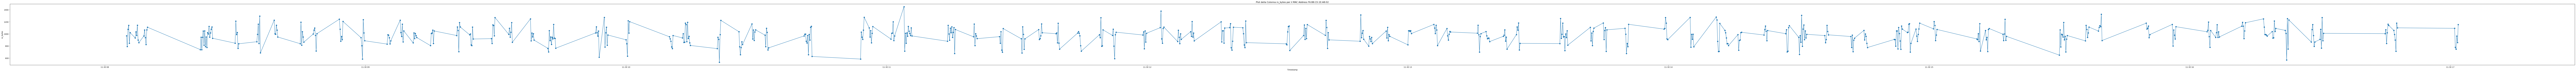

In [61]:
# Ordina il dataframe in base alla colonna 'timestamp'

df = df_original[2326:5043]

df['timestamp'] = pd.to_datetime(df['timestamp'])

# Specifica il mac_address di interesse
mac_address_interesse = 'F6:B8:15:1E:A8:02'

# Filtra il dataframe solo per il mac_address di interesse
df_mac = df[df['mac_address'] == mac_address_interesse]

plt.figure(figsize=(250, 6))

# Plotta la colonna 'cpu_max_cycle' solo per il mac_address di interesse
plt.plot(df_mac['timestamp'], df_mac['rx_bytes'], marker='o', linestyle='-')

# Aggiungi etichette e titolo al grafico
plt.xlabel('Timestamp')
plt.ylabel('rx_bytes')
plt.title(f'Plot della Colonna rx_bytes per il MAC Address {mac_address_interesse}')

# Mostra il grafico
plt.show()
